# 11_Simple-MLP-supervised-SBATCH

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import MLPSupervisedTrainingResults
from src.load_MNIST import load_MNIST

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_MNIST(
    root='./data', subset_frac=0.05, 
    batch_size=32, validation_ratio=6, seed=42
)

## Quick test

`sbatch sbatch_scripts/11_no-prune_fast.sh` Job 55637925

`sbatch sbatch_scripts/11_prune_fast.sh ` 55640983

**Updated model script for initialization**
```bash
$ sbatch sbatch_scripts/11_prune_fast.sh 
Submitted batch job 56479854
$ sbatch sbatch_scripts/11_no-prune_fast.sh 
Submitted batch job 56478616
```
**Fixed model state saving**
```bash
$ sbatch sbatch_scripts/11_no-prune_fast.sh 
Submitted batch job 56825308
$ sbatch sbatch_scripts/11_prune_fast.sh 
Submitted batch job 56825309
```

In [7]:
total_size = (28*28 * 16) + (16 * 10)
total_size

12704

In [28]:
no_prune_fast_result = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/no_prune_fast/sbatch-56825308_bs-32_sf-0.05_vr-6_id-0.5_nti-100_ugpp-False_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

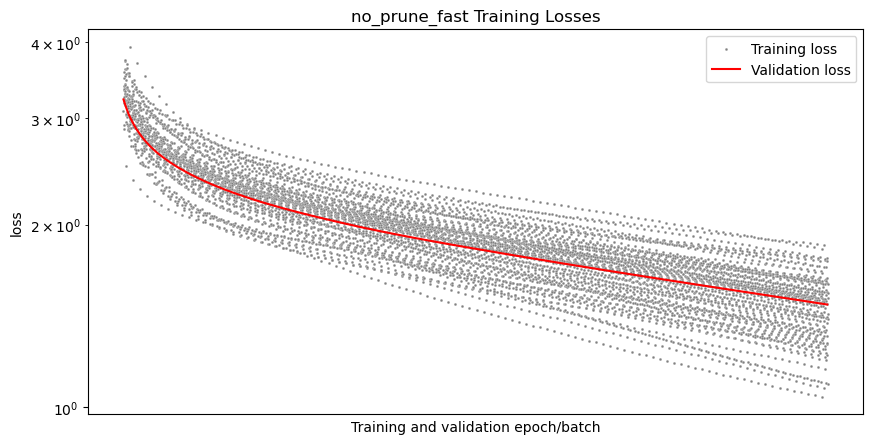

In [29]:
no_prune_fast_result.plot_training_losses()

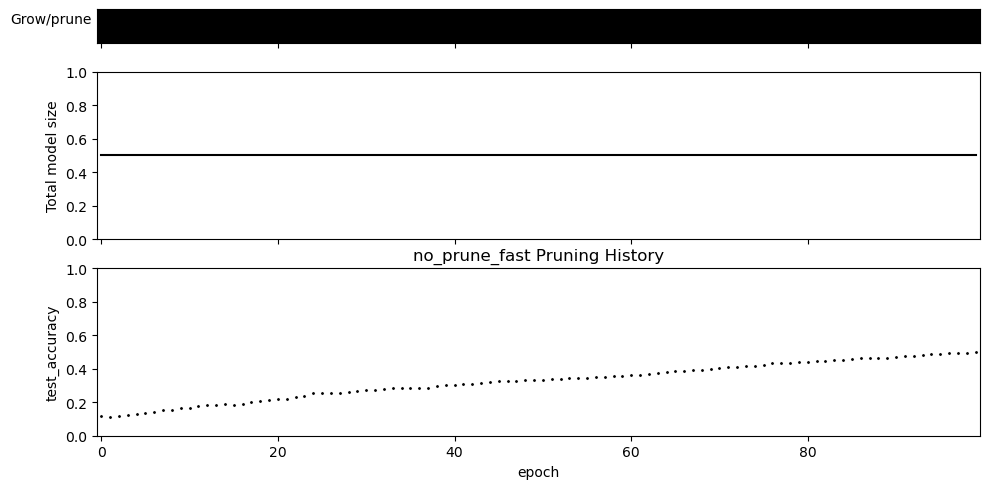

In [32]:
fig, ax = no_prune_fast_result.plot_pruning(figsize=(10, 5), norm_size=total_size, test_err_col='test_accuracy')

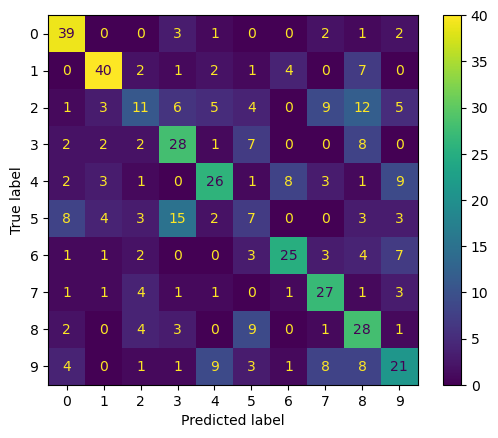

In [34]:
no_prune_fast_result.set_trained_model(epoch=99)
no_prune_fast_result.plot_confusion_matrix(test_dataloader)

In [35]:
prune_fast_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/prune_fast/sbatch-56825309_bs-32_sf-0.05_vr-6_id-0.5_nti-100_ugpp-True_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'prune_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

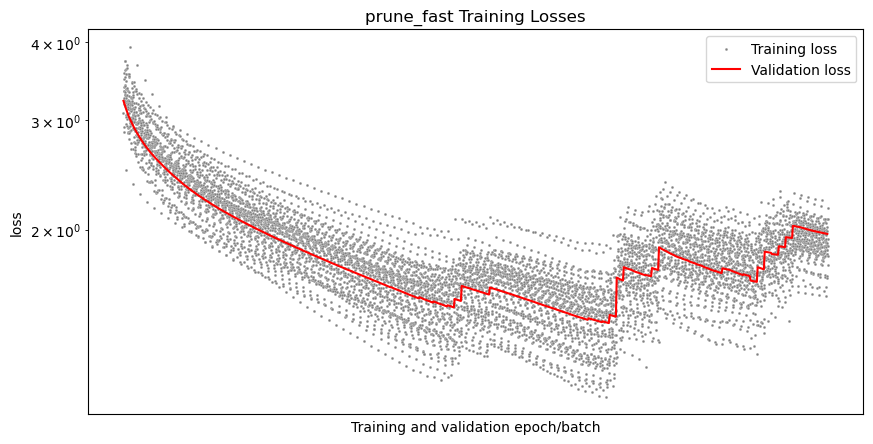

In [36]:
prune_fast_results.plot_training_losses()

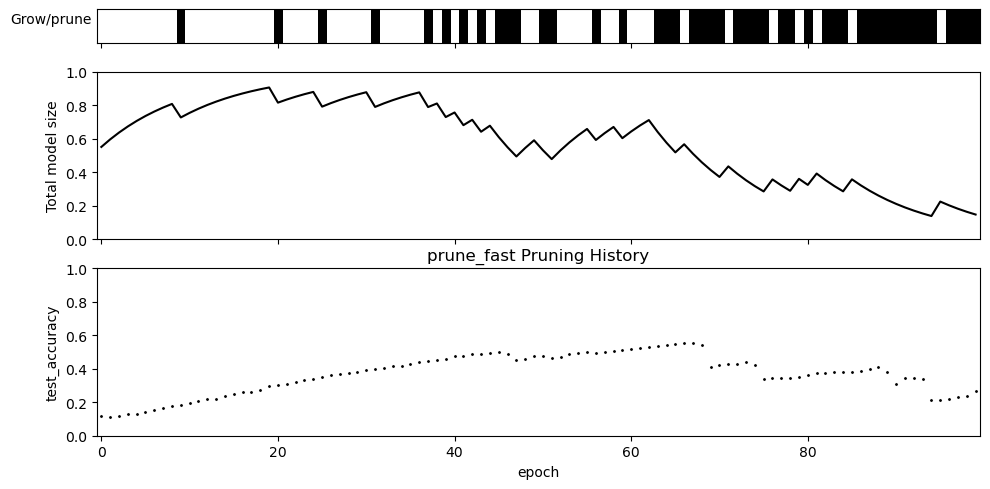

In [37]:
fig, axes = prune_fast_results.plot_pruning(figsize=(10, 5), norm_size=total_size, test_err_col='test_accuracy')

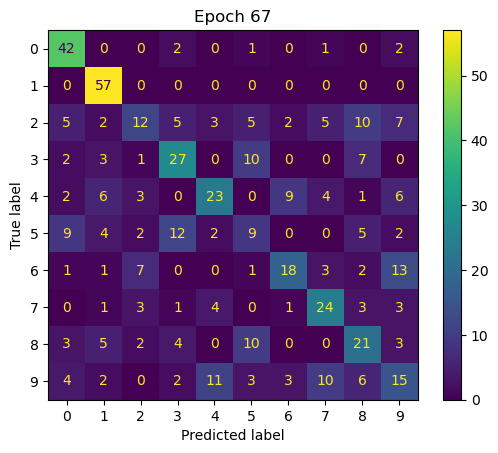

In [43]:
prune_fast_results.set_trained_model(epoch=67)
prune_fast_results.plot_confusion_matrix(test_dataloader)

# Full runs

500 epochs, 10% of MNIST

```bash
$ sbatch sbatch_scripts/11_no-prune_full.sh
Submitted batch job 56576285
$ sbatch sbatch_scripts/11_prune_full.sh
Submitted batch job 56576287
```

**Updated model state saving**
```bash
$ sbatch sbatch_scripts/11_no-prune_full.sh
Submitted batch job 56825948
$ sbatch sbatch_scripts/11_prune_full.sh
Submitted batch job 56825949
```

In [44]:
no_prune_full_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/no_prune_full/sbatch-56825948_bs-32_sf-0.1_vr-6_id-0.5_nti-500_ugpp-False_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_full Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

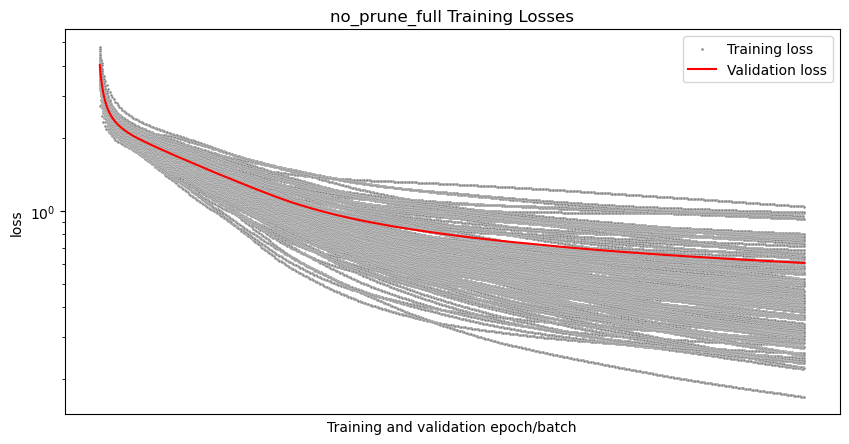

In [46]:
no_prune_full_results.plot_training_losses()

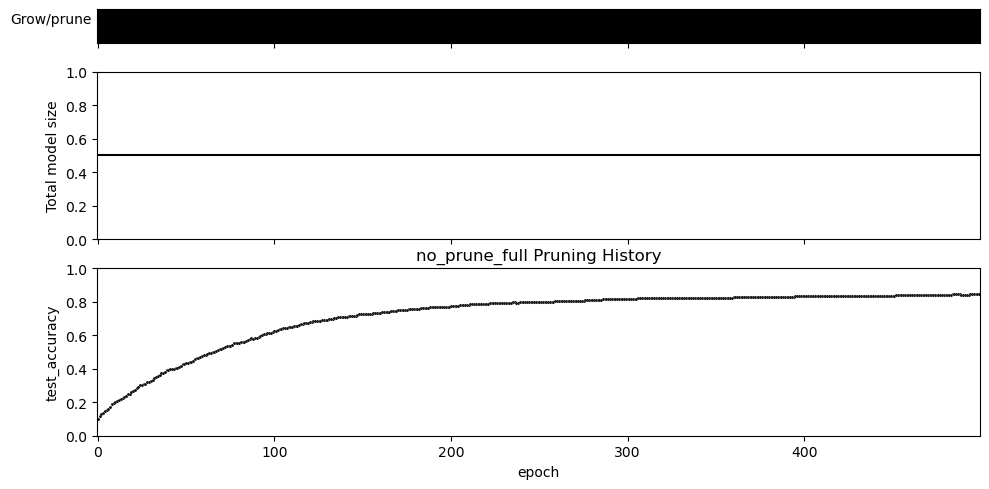

In [47]:
fig, ax = no_prune_full_results.plot_pruning(figsize=(10, 5), norm_size=total_size, test_err_col='test_accuracy')

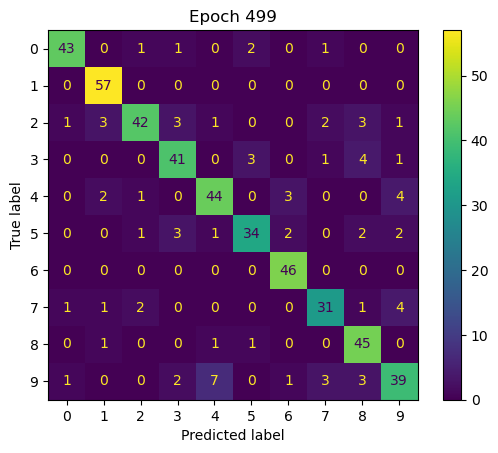

In [51]:
no_prune_full_results.set_trained_model(epoch=499)
no_prune_full_results.plot_confusion_matrix(test_dataloader)

In [45]:
prune_full_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/prune_full/sbatch-56825949_bs-32_sf-0.1_vr-6_id-0.5_nti-500_ugpp-True_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'prune_full Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

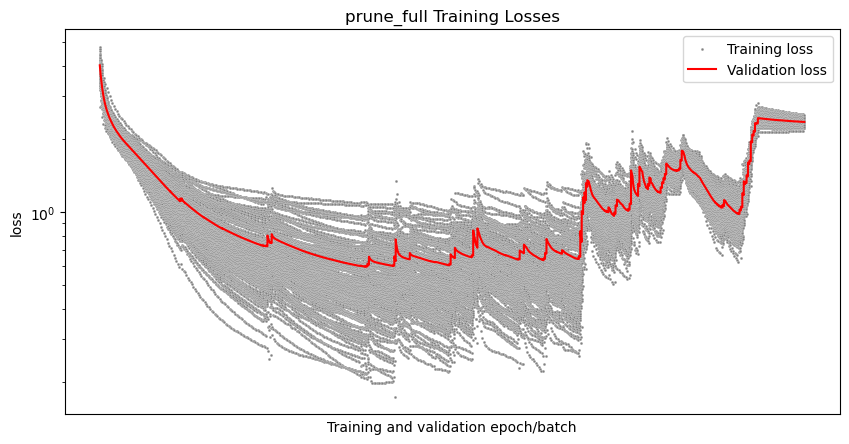

In [48]:
prune_full_results.plot_training_losses()

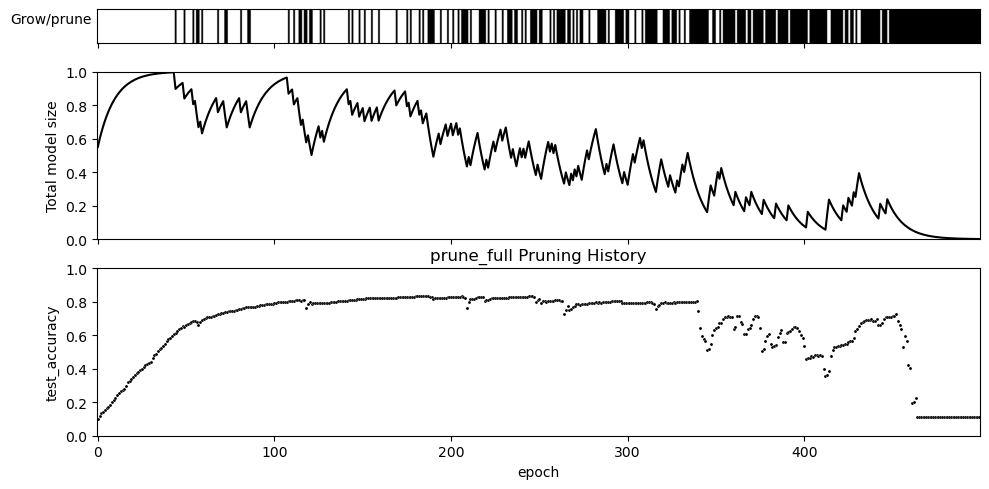

In [49]:
fig, ax = prune_full_results.plot_pruning(figsize=(10, 5), norm_size=total_size, test_err_col='test_accuracy')

In [56]:
len(prune_full_results.model_attr['synapse_count_history'])

501

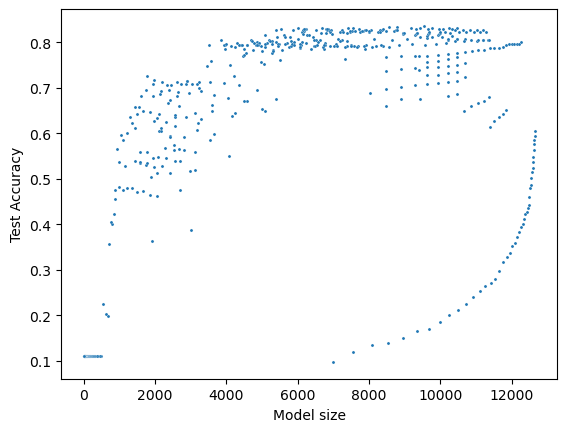

In [68]:
sns.scatterplot(
    x=prune_full_results.model_attr['synapse_count_history'][1:],
    y=prune_full_results.test_df['test_accuracy'],
    s=5
    # hue=prune_full_results.test_df['test_accuracy'],
    # palette='rocket_r'
)
plt.ylabel("Test Accuracy")
plt.xlabel("Model size")
plt.show()

In [53]:
prune_full_results.test_df.sort_values(by='test_accuracy').tail()

,epoch,test_accuracy,test_loss
185,185,0.832,17.308355
206,206,0.832,17.308974
184,184,0.833,17.395259
187,187,0.834,17.297336
186,186,0.836,17.249922


In [69]:
test_df = prune_full_results.test_df.copy()
test_df['model_size'] = prune_full_results.model_attr['synapse_count_history'][1:]

In [74]:
test_df.query("3000 < model_size < 4000").sort_values(by='test_accuracy').tail()

,epoch,test_accuracy,test_loss,model_size
315,315,0.786,19.834594,3973.0
327,327,0.793,20.232740,3527.0
323,323,0.793,20.242999,3967.0
326,326,0.795,19.974185,3920.0
339,339,0.804,19.206404,3856.0


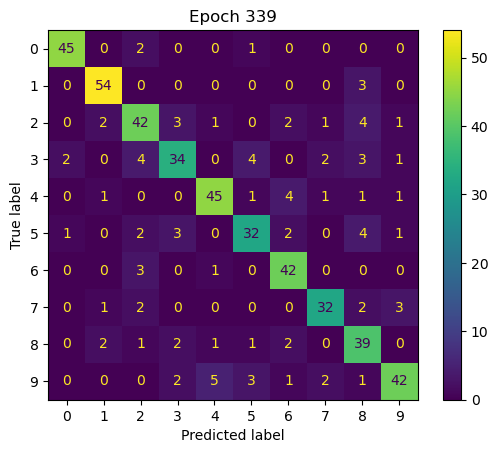

In [75]:
prune_full_results.set_trained_model(epoch=339)
prune_full_results.plot_confusion_matrix(test_dataloader)

In [77]:
test_df.query("model_size > 11000").sort_values(by='test_accuracy').tail()

,epoch,test_accuracy,test_loss,model_size
141,141,0.806,20.146656,11358.0
167,167,0.822,18.182427,11106.0
168,168,0.822,18.119771,11267.0
173,173,0.826,17.829182,11025.0
174,174,0.828,17.773287,11194.0


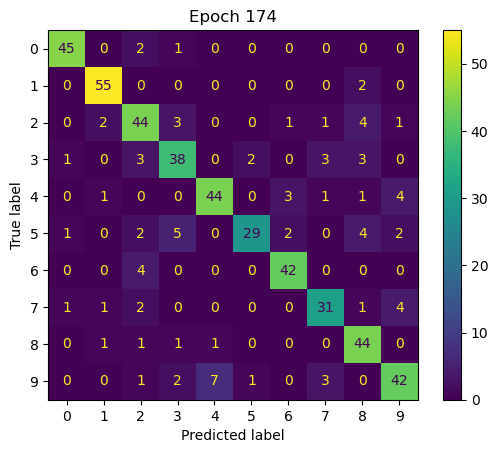

In [78]:
prune_full_results.set_trained_model(epoch=174)
prune_full_results.plot_confusion_matrix(test_dataloader)